In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [37]:
df = pd.read_csv(r'C:\Users\tejas\Desktop\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
data=df

In [40]:
df = data.drop(['Name', 'Ticket','PassengerId'], axis=1)

In [41]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [42]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [43]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [44]:
df['Family']=df['SibSp']+df['Parch']

In [45]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,NaN,S,1
1,1,1,female,38.0,1,0,71.2833,C85,C,1
2,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1
4,0,3,male,35.0,0,0,8.0500,NaN,S,0


In [46]:
data=df
df = data.drop(['SibSp', 'Parch'], axis=1)

In [47]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family
0,0,3,male,22.0,7.2500,NaN,S,1
1,1,1,female,38.0,71.2833,C85,C,1
2,1,3,female,26.0,7.9250,NaN,S,0
3,1,1,female,35.0,53.1000,C123,S,1
4,0,3,male,35.0,8.0500,NaN,S,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     204 non-null    object 
 6   Embarked  889 non-null    object 
 7   Family    891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


<Axes: xlabel='Survived', ylabel='Age'>

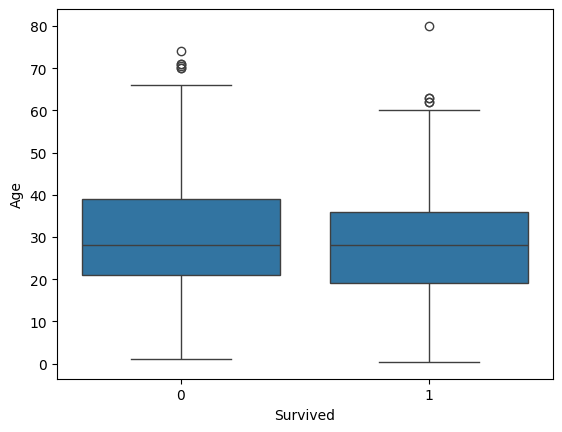

In [49]:
sns.boxplot(data=df, x='Survived', y='Age')

<Axes: xlabel='Survived', ylabel='Age'>

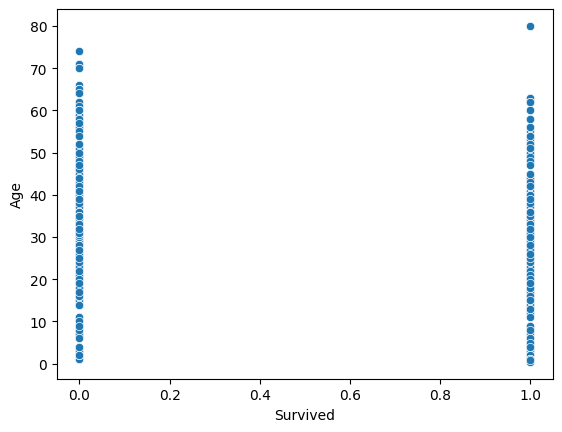

In [50]:
sns.scatterplot(data=df, x='Survived', y='Age')

In [51]:
df['Age'].mean()

29.69911764705882

In [52]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     204 non-null    object 
 6   Embarked  889 non-null    object 
 7   Family    891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [54]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     204 non-null    object 
 6   Embarked  889 non-null    object 
 7   Family    891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [56]:
df['Cabin'].fillna('#', inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     891 non-null    object 
 6   Embarked  889 non-null    object 
 7   Family    891 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [58]:
df['Cabin1']=[0 if x=='#' else 1 for x in df['Cabin']]

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     891 non-null    object 
 6   Embarked  889 non-null    object 
 7   Family    891 non-null    int64  
 8   Cabin1    891 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [60]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family,Cabin1
0,0,3,male,22.0,7.2500,#,S,1,0
1,1,1,female,38.0,71.2833,C85,C,1,1
2,1,3,female,26.0,7.9250,#,S,0,0
3,1,1,female,35.0,53.1000,C123,S,1,1
4,0,3,male,35.0,8.0500,#,S,0,0


In [61]:
data=df
df = data.drop(['Cabin'], axis=1)

In [62]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Cabin1
0,0,3,male,22.0,7.2500,S,1,0
1,1,1,female,38.0,71.2833,C,1,1
2,1,3,female,26.0,7.9250,S,0,0
3,1,1,female,35.0,53.1000,S,1,1
4,0,3,male,35.0,8.0500,S,0,0


In [63]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [64]:
df_encoded = pd.get_dummies(df, columns=['Embarked'], drop_first=False)

In [65]:
df=df_encoded

In [66]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Family,Cabin1,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,7.2500,1,0,0,0,1
1,1,1,female,38.0,71.2833,1,1,1,0,0
2,1,3,female,26.0,7.9250,0,0,0,0,1
3,1,1,female,35.0,53.1000,1,1,0,0,1
4,0,3,male,35.0,8.0500,0,0,0,0,1


In [67]:
df.corr()

C:\Users\tejas\AppData\Local\Temp\ipykernel_17052\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Survived,Pclass,Age,Fare,Family,Cabin1,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.069809,0.257307,0.016639,0.316912,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,-0.331339,-0.549500,0.065997,-0.725541,-0.243292,0.221009,0.081720
Age,-0.069809,-0.331339,1.000000,0.091566,-0.248512,0.233123,0.032024,-0.013855,-0.027121
Fare,0.257307,-0.549500,0.091566,1.000000,0.217138,0.482075,0.269335,-0.117216,-0.166603
Family,0.016639,0.065997,-0.248512,0.217138,1.000000,-0.009175,-0.046215,-0.058592,0.079977
Cabin1,0.316912,-0.725541,0.233123,0.482075,-0.009175,1.000000,0.208528,-0.129572,-0.110087
Embarked_C,0.168240,-0.243292,0.032024,0.269335,-0.046215,0.208528,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,-0.013855,-0.117216,-0.058592,-0.129572,-0.148258,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,-0.027121,-0.166603,0.079977,-0.110087,-0.778359,-0.496624,1.000000


C:\Users\tejas\AppData\Local\Temp\ipykernel_17052\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

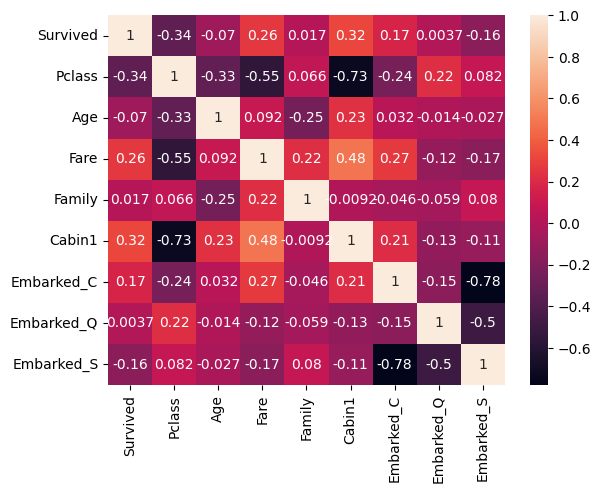

In [68]:
sns.heatmap(df.corr(), annot=True)

In [69]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Family,Cabin1,Embarked_C,Embarked_Q,Embarked_S
0,0,3,male,22.0,7.2500,1,0,0,0,1
1,1,1,female,38.0,71.2833,1,1,1,0,0
2,1,3,female,26.0,7.9250,0,0,0,0,1
3,1,1,female,35.0,53.1000,1,1,0,0,1
4,0,3,male,35.0,8.0500,0,0,0,0,1


In [72]:
# data=df
# df=data.drop(['Sex'], axis=1)
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [73]:
y=df['Survived']
X=df.drop(['Survived'], axis=1)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = True)

In [75]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [76]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [77]:
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.7596153846153846

In [78]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       184
           1       0.71      0.70      0.70       128

    accuracy                           0.76       312
   macro avg       0.75      0.75      0.75       312
weighted avg       0.76      0.76      0.76       312

